# The random number generation method, which are widely discussed in different llitterature


In [1]:
import random
import numpy as np

class RandomNumber() :
    # this is the classic method where all three implementations are done, via the test, only method one is usable
    print 'This is random number class and it is being called here'
    def randomNumber_1(self, n):
        a = []
        for i in range(0, n):
            a.append(random.random())
        rn = np.sqrt(12.0/float(n)) *(np.sum(a) - n/2.0)
        return rn

    def randomNumber_2(self): # uniform
        return random.random()

    def randomNumber_3(self):
        return np.random.randn(1)
# from the test below we could clearly see that more random number generation functions are suitable, hence we add them here
    def randomNumber_lcg(self):
        m = 2**31
        a = 1103515245
        c = 12345 # If c = 0, the generator is often called a multiplicative congruential generator (MCG), or Lehmer RNG
        seed = 1
        seed = (a * seed + c) % m
    # it needs to be standardlized otherwise, it is not a 
        seed = (seed - 1093731792.28) / 612364760.632 # normalized lcg, it has to be hard coded for the moment
        return seed
    
    def randonNumber_BM(self):
        x1 = random.random()
        x2 = random.random()
        y1 = np.sqrt(-2*math.log(x1))* math.cos(2*math.pi*x2)
        y2 = np.sqrt(-2*math.log(x1))* math.sin(2*math.pi*x2)
        return y1,y2 #I dont know in the case of only one random number, which one I should use
    

SyntaxError: Missing parentheses in call to 'print'. Did you mean print('This is random number class and it is being called here')? (<ipython-input-1-26fc3f9ede56>, line 6)

### Different way to call the random  number generator and test them via graphic plot

In [ ]:
# First method
ranNb = RandomNumber()
n = 1000 # 12 is enough

In [ ]:
# an internet copied function on how to calculation autocorrelation, which I am not sure if it is correct
def autocorr(x):
    result = np.correlate(x, x, mode='full')
    return result[result.size/2:]

In [2]:
np.sqrt(12/float(n))


NameError: name 'np' is not defined

In [ ]:
#create a loop to plot this random number
rn = []
for i in range (0, n):
    rn.append(ranNb.randomNumber_1(n))

In [3]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
fig=plt.figure(figsize=(8, 8), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(rn,'ro')
#plt.title('This is from Paul Wilmote book')
plt.grid()
plt.show()

NameError: name 'rn' is not defined

<Figure size 640x640 with 0 Axes>

In [ ]:
# try the second method
rn_2 = []
for i in range (0, n):
    rn_2.append(ranNb.randomNumber_2())

In [ ]:
plt.plot(rn_2,'yo')
plt.title('Uniform')
plt.grid()
plt.show()
# we could see from the plot that rand()is basically a uniformly distributed random varialbe from 0 to 1 [0,1]

In [ ]:
# try the third method
rn_3 = []
for i in range (0, n):
    rn_3.append(ranNb.randomNumber_3())
rn_3= np.concatenate(rn_3)
plt.plot(rn_3,'go')
plt.title('Numpy integrated method')
plt.grid()
plt.show()

## LCG method

In [4]:
# now we have three graph and the questionis how to test or check if they are random enough
# X_{n+1}=\left(aX_{n}+c\right)~~{\bmod {~}}~m


In [5]:
def lcg(modulus, a, c, seed):
  while True:
    seed = (a * seed + c) % modulus
    yield seed

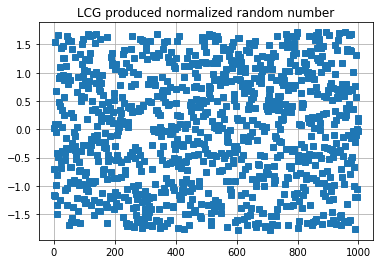

In [6]:
import numpy as np
import matplotlib.pyplot as plt
rn_lcg = []
m = 2**31
a = 1103515245
c = 12345 # If c = 0, the generator is often called a multiplicative congruential generator (MCG), or Lehmer RNG
seed = 1
n = 1000
for i in range (0, n):
    seed = (a * seed + c) % m
    # it needs to be standardlized otherwise, it is not a 
    rn_lcg.append(seed)

rn_lcg_norm = (rn_lcg - np.mean(rn_lcg)) / np.std(rn_lcg) # normalized lcg
plt.plot(rn_lcg_norm,'s'),'s'
plt.title('LCG produced normalized random number')
plt.grid()
plt.show()

# Below is the Box - Muller method 

### It takes uniformly distributed variables and turns them into Normal. The basic uniform numbers can be generated by any number of methods. It takes two uniform random numbers u1 and u2 between zero and one and combines them to give two numbers z1 and z2 that are both Normally distributed

In [7]:
import math as math
def boxMuller(n):
    rnlist = []
    for i in range (0,n):
        u1 = ranNb.randomNumber_2()
        u2 = ranNb.randomNumber_2()
        z1 = np.sqrt(-2*math.log(u1))* math.cos(2*math.pi*u2)
        z2 = np.sqrt(-2*math.log(u1))* math.sin(2*math.pi*u2)
        rnlist.append(z1)
        rnlist.append(z2)
    return rnlist

In [8]:
# plot the Box -.Muller
n = 500
plt.plot(boxMuller(n),'bo', color = 'black')
plt.title("Box-Muller method")
plt.grid()
plt.show()

NameError: name 'ranNb' is not defined

## Now we need a way to test the random number generator quality. 
## Serial correlation is also known as autocorrelation or lagged correlation.
### we also need to have the normal distributed random variables, with mean equals to zero and stdev = 1

In [9]:
lag = 2
rnBM = boxMuller(n)
print "mean of Box Muller is", np.mean(rnBM)
print "the standard diviation is", np.std(rnBM)
print "the autocorrelation is", np.corrcoef(rnBM[:-lag],rnBM[lag:]).diagonal(1)

SyntaxError: invalid syntax (<ipython-input-9-638aef280f4e>, line 3)

In [10]:
print "mean of LCG is", np.mean(rn_lcg)
print "the standard deviation is", np.std(rn_lcg)
print "the autocorrelation for LCG", np.corrcoef(rn_lcg[:-lag],rn_lcg[lag:]).diagonal(1)

SyntaxError: invalid syntax (<ipython-input-10-6127b39360ed>, line 1)

In [11]:
print "mean of Wilmiot is", np.mean(rn)
print "the standard deviation is", np.std(rn)
print "the autocorrelation for wilmiot", np.corrcoef(rn[:-lag],rn[lag:]).diagonal(1)

SyntaxError: invalid syntax (<ipython-input-11-af1664c2e94d>, line 1)

In [12]:
print "mean of  is", np.mean(rn_2)
print "the standard deviation is", np.std(rn_2)
print "the autocorrelation for uniform distribution", np.corrcoef(rn_2[:-lag],rn_2[lag:]).diagonal(1)

SyntaxError: invalid syntax (<ipython-input-12-a124e10b87e1>, line 1)

In [13]:
print "mean of np random is", np.mean(rn_3)
print "the standard deviation is", np.std(rn_3)
print "the autocorrelation for np random", np.corrcoef(rn_3[:-lag],rn_3[lag:]).diagonal(1)

SyntaxError: invalid syntax (<ipython-input-13-0f32e392b9e7>, line 1)

### Now we need to create a loop for a list og lag

In [14]:
lagList = range(2,n*5/2) # the list can be very long if needed
autoCorrBM =  [np.corrcoef(rnBM[:-lag],rnBM[lag:]).diagonal(1) for lag in lagList]
autoCorrWilmote = [np.corrcoef(rn[:-lag],rn[lag:]).diagonal(1) for lag in lagList]
autoCorrRN_2 = [np.corrcoef(rn_2[:-lag],rn_2[lag:]).diagonal(1) for lag in lagList]
autoCorrRN_3 = [np.corrcoef(rn_3[:-lag],rn_3[lag:]).diagonal(1) for lag in lagList]
autoCorrLCG =  [np.corrcoef(rn_lcg[:-lag],rn_lcg[lag:]).diagonal(1) for lag in lagList]


TypeError: 'float' object cannot be interpreted as an integer

In [15]:
fig=plt.figure(figsize=(8, 8), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(autoCorrBM, color = 'pink')
#plt.plot(autoCorrWilmote,'go')
plt.plot(autoCorrRN_2,'ro')
plt.plot(autoCorrRN_3,'yo')
plt.plot(autoCorrLCG, 'bo')
plt.title('different autocorrelation for random number generator process')
plt.grid()
plt.show()


NameError: name 'autoCorrBM' is not defined

<Figure size 640x640 with 0 Axes>

In [16]:
print "Mean of auto correlation" ,{'BM':np.mean(autoCorrBM),'Wilmot': np.mean(autoCorrWilmote),'Uniform':np.mean(autoCorrRN_2),'numpy':np.mean(autoCorrRN_3),'LCG':np.mean(autoCorrLCG)}
print "Mean of RN each method" ,{'BM':np.mean(rnBM),'Wilmot': np.mean(rn),'Uniform':np.mean(rn_2),'numpy':np.mean(rn_3),'LCG':np.mean(rn_lcg)}
print "Stdev of RN each method" ,{'BM':np.std(rnBM),'Wilmot': np.std(rn),'Uniform':np.mean(rn_2),'numpy':np.std(rn_3),'LCG':np.std(rn_lcg)}


SyntaxError: invalid syntax (<ipython-input-16-5fe7e631902d>, line 1)

In [17]:
with plt.xkcd():
    # Based on "Stove Ownership" from XKCD by Randall Monroe
    # http://xkcd.com/418/

    fig = plt.figure()
    ax = fig.add_axes((0.1, 0.2, 0.8, 0.7))
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    plt.xticks([])
    plt.yticks([])
    ax.set_ylim([-30, 10])

    data = np.ones(100)
    data[70:] -= np.arange(30)

    plt.annotate(
        'Life is so tough, right? Do you like Putin?',
        xy=(70, 1), arrowprops=dict(arrowstyle='->'), xytext=(15, -10))

    plt.plot(data)

    plt.xlabel('time')
    plt.ylabel('my overall health')
    fig.text(
        0.5, 0.05,
        '"Russian women are pretty
        ',
        ha='center')

SyntaxError: EOL while scanning string literal (<ipython-input-17-7cdb5e6e90b0>, line 26)

In [2]:
import numpy as np
a = np.arange(15).reshape(3, 5)

0.99520488596571099

#### Below we calculate the auto covariance and auto correlation for the random  number generated by various method